In [1]:
from matplotlib import pyplot as plt
import os

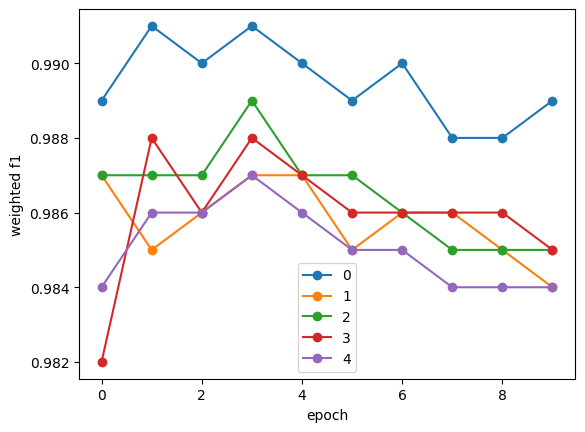

In [2]:
folders = [f'with_balanced_weighting_biodistilbert_fold_{i}' for i in range(5)]

for cv in range(5):
    folder = f'with_balanced_weighting_biodistilbert_fold_{cv}'
    with open(os.path.join(folder, 'log.txt'), 'r') as fid:
        lines = fid.readlines()
    eval_f1 = []
    for line in lines:
        if line.startswith('weighted avg'):
            eval_f1.append(line.split()[4])
    plt.plot([float(x) for x in eval_f1], '-o', label=cv)
plt.xlabel('epoch')
plt.ylabel('weighted f1')
plt.legend()

In [3]:
with open('with_balanced_weighting_biodistilbert_fold_0/eval.txt', 'r') as fid:
    lines = fid.readlines()
    

In [4]:
[(i,c) for i,c in enumerate(lines[4])]

[(0, ' '),
 (1, ' '),
 (2, ' '),
 (3, ' '),
 (4, ' '),
 (5, ' '),
 (6, ' '),
 (7, ' '),
 (8, ' '),
 (9, 'A'),
 (10, 'G'),
 (11, 'E'),
 (12, ' '),
 (13, ' '),
 (14, ' '),
 (15, ' '),
 (16, ' '),
 (17, ' '),
 (18, '0'),
 (19, '.'),
 (20, '9'),
 (21, '8'),
 (22, '5'),
 (23, ' '),
 (24, ' '),
 (25, ' '),
 (26, ' '),
 (27, ' '),
 (28, '0'),
 (29, '.'),
 (30, '9'),
 (31, '8'),
 (32, '2'),
 (33, ' '),
 (34, ' '),
 (35, ' '),
 (36, ' '),
 (37, ' '),
 (38, '0'),
 (39, '.'),
 (40, '9'),
 (41, '8'),
 (42, '3'),
 (43, ' '),
 (44, ' '),
 (45, ' '),
 (46, ' '),
 (47, ' '),
 (48, ' '),
 (49, ' '),
 (50, '3'),
 (51, '9'),
 (52, '4'),
 (53, '\n')]

In [5]:
rows = [(4,19),(24,39),(44,59),(64,79),(84,99)]

files = {}
for cv in range(5):
    with open(f'with_balanced_weighting_biodistilbert_fold_{cv}/eval.txt', 'r') as fid:
        lines = fid.readlines()
        files[cv] = lines

In [6]:
from copy import deepcopy
import numpy as np

output = deepcopy(files[0])

In [7]:
pm = '+/-'

# different note types
for i1, i2 in rows:

    # different phi type
    for i in range(i1, i2):

        # this is the empty line
        if i in [15,35,55,75,95]: continue

        # reads in all the folds
        precisions, recalls, f1s, ns = [], [], [], []
        for _, lines in files.items():
            if len(lines[i].split()) == 5:
                phi, precision, recall, f1, n = lines[i].split()
            else:
                phi1, phi2, precision, recall, f1, n = lines[i].split()
                phi = phi1 + ' ' + phi2
            print(phi, precision, recall, f1)
            precisions.append(float(precision))
            recalls.append(float(recall))
            f1s.append(float(f1))
            ns.append(int(n))
        
        output[i] = u'{0:>15s}{1:12.3f}+/-{2:5.3f}{3:12.3f}+/-{4:5.3f}{5:12.3f}+/-{6:5.3f}{7:14d}+/-{8:<5d}\n'.\
            format(phi, np.mean(precisions), np.std(precisions), \
                        np.mean(recalls), np.std(recalls),\
                        np.mean(f1s), np.std(f1s), \
                        int(np.mean(ns)), int(np.std(ns)))
            # format(phi, np.mean(precisions), np.std(precision), \
            #             np.mean(recalls), np.std(recalls),\
            #             np.mean(f1s), np.std(f1s),\
            #             int(np.mean(ns)), int(np.std(ns)))
        
        print(output[i])

# make the header align
for i in range(len(output)):
    if output[i].lstrip().startswith('precision'):
        output[i] = '{0:>15s}{1:>20s}{2:>20s}{3:>20s}{4:>20s}\n'.\
        format('', 'precision', 'recall', 'f1-score', 'support')

with open('tmp.txt', 'w') as fid:
    fid.writelines(output)

AGE 0.985 0.982 0.983
AGE 0.986 0.983 0.985
AGE 0.984 0.962 0.973
AGE 1.000 0.921 0.959
AGE 0.964 0.977 0.970
            AGE       0.984+/-0.011       0.965+/-0.023       0.974+/-0.009           382+/-49   

DATE 1.000 0.995 0.997
DATE 1.000 0.996 0.998
DATE 1.000 0.993 0.996
DATE 0.999 0.995 0.997
DATE 0.999 0.992 0.995
           DATE       1.000+/-0.000       0.994+/-0.001       0.997+/-0.001         20646+/-1126 

EMAIL 1.000 1.000 1.000
EMAIL 1.000 1.000 1.000
EMAIL 0.946 0.981 0.964
EMAIL 1.000 1.000 1.000
EMAIL 0.769 1.000 0.870
          EMAIL       0.943+/-0.089       0.996+/-0.008       0.967+/-0.050            30+/-15   

HOSPITAL 0.945 0.907 0.926
HOSPITAL 0.953 0.875 0.913
HOSPITAL 0.949 0.879 0.913
HOSPITAL 0.970 0.833 0.896
HOSPITAL 0.925 0.862 0.893
       HOSPITAL       0.948+/-0.014       0.871+/-0.024       0.908+/-0.012          1168+/-201  

IDNUM 0.988 0.982 0.985
IDNUM 0.998 0.970 0.984
IDNUM 0.981 0.982 0.982
IDNUM 0.985 0.989 0.987
IDNUM 0.981 0.981 0.981
    

In [8]:
with open('tmp.txt', 'w') as fid:
    fid.writelines(files[0])